In [2]:
# compare algorithms
import numpy as np
from pandas import read_csv
from matplotlib import pyplot
from sklearn import preprocessing

from sklearn.model_selection import train_test_split

from sklearn import cluster

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
# Load dataset
names = ['movieId','imdbId','tmdbId']
dataset_links = read_csv('../ml-latest-small/links.csv', names=names)

names = ['movieId','title','genres']
dataset_movies = read_csv('../ml-latest-small/movies.csv', names=names)

names = ['userId','movieId','rating','timestamp']
dataset_ratings = read_csv('../ml-latest-small/ratings.csv', names=names)

names = ['userId','movieId','tag','timestamp']
dataset_tags = read_csv('../ml-latest-small/tags.csv', names=names)

In [4]:
dataset_links   = dataset_links.dropna()
dataset_movies  = dataset_movies.dropna()
dataset_ratings = dataset_ratings.dropna()
dataset_tags    = dataset_tags.dropna()

In [5]:
dataset_tags = dataset_tags.drop(['userId','timestamp'], axis=1)
dataset_ratings = dataset_ratings.drop(['userId','timestamp'], axis=1)
dataset_movies.sort_values(by=['movieId'])
print(dataset_ratings)

        movieId  rating
0             1     4.0
1             3     4.0
2             6     4.0
3            47     5.0
4            50     5.0
5            70     3.0
6           101     5.0
7           110     4.0
8           151     5.0
9           157     5.0
10          163     5.0
11          216     5.0
12          223     3.0
13          231     5.0
14          235     4.0
15          260     5.0
16          296     3.0
17          316     3.0
18          333     5.0
19          349     4.0
20          356     4.0
21          362     5.0
22          367     4.0
23          423     3.0
24          441     4.0
25          457     5.0
26          480     4.0
27          500     3.0
28          527     5.0
29          543     4.0
...         ...     ...
100806   150401     3.0
100807   152077     4.0
100808   152081     4.0
100809   152372     3.5
100810   155064     3.5
100811   156371     5.0
100812   156726     4.5
100813   157296     4.0
100814   158238     5.0
100815   158721 

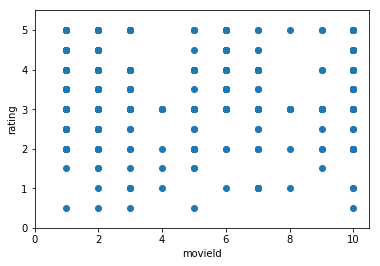

In [6]:
pyplot.plot(dataset_ratings['movieId'],dataset_ratings['rating'],'o')
pyplot.ylabel('rating')
pyplot.xlabel('movieId')
pyplot.axis([0, 10.5, 0, 5.5])
pyplot.show()

      movieId                     tag
0       60756                   funny
1       60756         Highly quotable
2       60756            will ferrell
3       89774            Boxing story
4       89774                     MMA
5       89774               Tom Hardy
6      106782                   drugs
7      106782       Leonardo DiCaprio
8      106782         Martin Scorsese
9       48516            way too long
10        431               Al Pacino
11        431                gangster
12        431                   mafia
13       1221               Al Pacino
14       1221                   Mafia
15       5995               holocaust
16       5995              true story
17      44665            twist ending
18      52604         Anthony Hopkins
19      52604         courtroom drama
20      52604            twist ending
21      88094                 britpop
22      88094      indie record label
23      88094                   music
24     144210         dumpster diving
25     14421

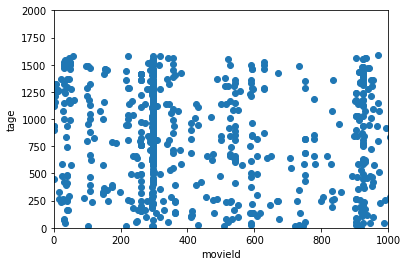

In [7]:
print(dataset_tags)
label_encoder = preprocessing.LabelEncoder()
pyplot.plot(dataset_tags['movieId'],label_encoder.fit_transform(dataset_tags['tag']),'o')
pyplot.ylabel('tage')
pyplot.xlabel('movieId')
pyplot.axis([0, 1000, 0, 2000])
pyplot.show()


In [8]:
model_tm = cluster.KMeans(n_clusters = 10)
predict_tm = model_tm.fit(label_encoder.fit_transform(dataset_tags['tag']).reshape(-1, 1),dataset_tags['movieId'])
labels_tm = predict_tm.labels_
print(labels_tm)

[0 1 4 ... 0 0 1]


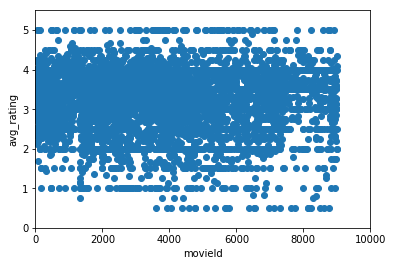

In [9]:
#Find average rating for all movies
movies = []
avg_rating = []
for currMovie in set(dataset_ratings['movieId']):
    list = [i for i,x in enumerate(dataset_ratings['movieId']) if x==currMovie]
    count = 0
    total = 0
#     print(len(list))
    for k in list:
        count += 1
        total += dataset_ratings['rating'][k]
    if count != 0:
        movies.append(currMovie)
        avg_rating.append(total/count)

pyplot.plot(movies,avg_rating,'o')
pyplot.ylabel('avg_rating')
pyplot.xlabel('movieId')
pyplot.axis([0, 10000, 0, 5.5])
pyplot.show()

In [10]:
model_rm = cluster.KMeans(n_clusters = 10)
predict_rm = model_rm.fit(np.array(avg_rating).reshape(-1, 1),movies)
labels_rm = predict_rm.labels_
print(labels_rm)

[0 3 3 ... 6 5 5]


In [11]:
recommendation = []
for x in range(min(len(labels_rm),len(labels_tm))):
    if labels_rm[x] == labels_tm[x]:
        recommendation.append((movies[x], True))
    else:
        recommendation.append((movies[x], False))
print(recommendation)

[(1, True), (2, False), (3, False), (4, False), (5, False), (6, False), (7, True), (8, False), (9, False), (10, False), (11, False), (12, False), (13, False), (14, False), (15, False), (16, True), (17, False), (18, False), (19, False), (20, False), (21, False), (22, True), (23, False), (24, False), (25, False), (26, False), (27, False), (28, False), (29, False), (30, False), (31, False), (32, False), (34, False), (36, False), (38, False), (39, False), (40, False), (41, False), (42, False), (43, False), (44, False), (45, False), (46, False), (47, False), (48, False), (65585, True), (50, False), (52, False), (53, False), (54, False), (55, True), (57, False), (58, False), (60, False), (61, False), (62, False), (63, False), (64, False), (65, False), (66, False), (68, False), (69, False), (70, False), (71, False), (72, False), (73, False), (74, False), (75, False), (76, False), (77, False), (78, False), (79, False), (80, False), (81, False), (82, False), (83, False), (85, False), (86, False